# **Example 6.2.2 (Visualization of positional encoding)**

This example serves as an illustrative way of generating and visualizing positional encodings, a fundamental concept in sequence modeling, particularly in architectures like transformers commonly used in natural language processing (NLP) and time series analysis.

- Positional encodings are numerical representations assigned to each word or element in a sequence based on its position within that sequence.
- In the context of sequence modeling, they help the model understand the order of words or elements in a sentence or sequence. This capability is vital for tasks where the order of elements carries important semantic meaning, such as language understanding in NLP or temporal analysis in time series data.
- Unlike recurrent neural networks (RNNs), which inherently capture sequential dependencies through their recurrent connections, transformer models lack this inherent understanding of sequence order due to their architecture's parallelization.
-These encodings are usually generated using mathematical functions such as sine and cosine functions and they are added to the input data of the model, usually as extra information along with the words or elements.


In [1]:
#Import the libraries
import numpy as np
import matplotlib.pyplot as plt


###Define a function that generates the positional encodings.
Given a sequence of elements $\tilde{x}_i \in \mathbb{R}^D$, with components $\tilde{x}_{i,j}$, subindex $i$ represents the position of the element inside the sequence and $j$ the position of each scalar inside each vector. Then, a positional encoding is applied as
\begin{equation}
    x_i = \tilde{x}_i + p_i
\end{equation}
where $p_i$ is a positional vector whose  components with even and odd indexes are
\begin{equation}
\begin{split}
    p_{i,2j} & = \sin\left(\frac{i}{T^{\frac{2j}{D}}}\right)\\
    p_{i,2j+1} & = \cos\left(\frac{i}{T^{\frac{2j}{D}}}\right)
    \end{split}
\end{equation}
for $1 \leq 2i, 2i+1 \leq D$. Commonly parameter $T$ is set to $10^4$, while the dimension of the sequence elements is  512.



In [ ]:
def get_position_encodings(seq_len, D):
    # Create a matrix of zeros
    p = np.zeros((seq_len, D))
    # Generate indexes for even-indexed columns
    indexes = np.arange(int(D/2))
    # Calculate denominators for sine and cosine functions
    denominators = np.power(10000, 2*indexes/D)
    # Generate sequence of numbers from 0 to length of sequence
    k = np.arange(seq_len)
    # Assign sine values to even-indexed columns and cosine values to odd-indexed columns
    p[:, ::2] = np.sin(k[:, None] / denominators[None, :])
    p[:, 1::2] = np.cos(k[:, None] / denominators[None, :])

    return p

### Create position encodings using the sequence length and dimension

In [ ]:
# Define the sequence length and the dimensionality of the position encodings
s = 100  # sequence length
D = 512  # dimensionality of the model
# Generate position encodings
position_encodings = get_position_encodings(s, D)

### Visualization of the encodings

The encodings are then visualized in two forms: a 2D plot and a 3D plot

For the 2D plot:
- x-axis: Represents the dimension of the position encodings.
- y-axis: Represents the position in the sequence.

For the 3D plot:
- x-axis: Represents the dimension of the position encodings.
- y-axis: Represents the position in the sequence.
- z-axis: Represents the value of the position encoding.

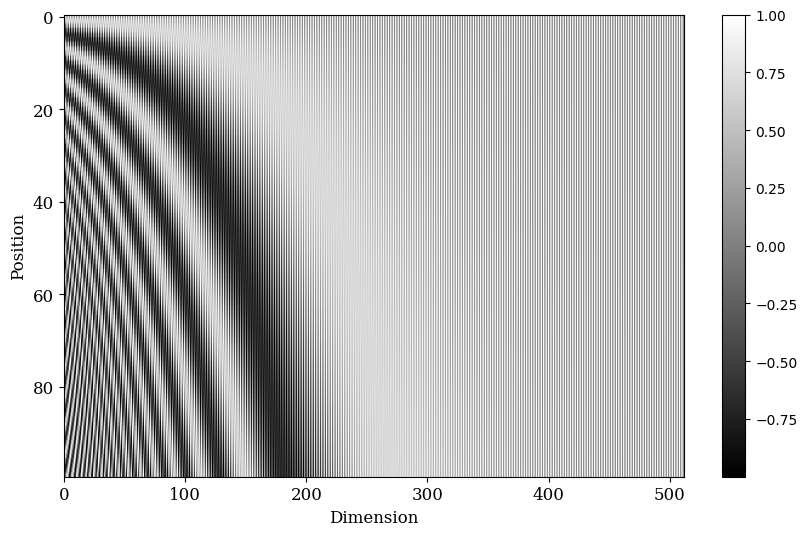

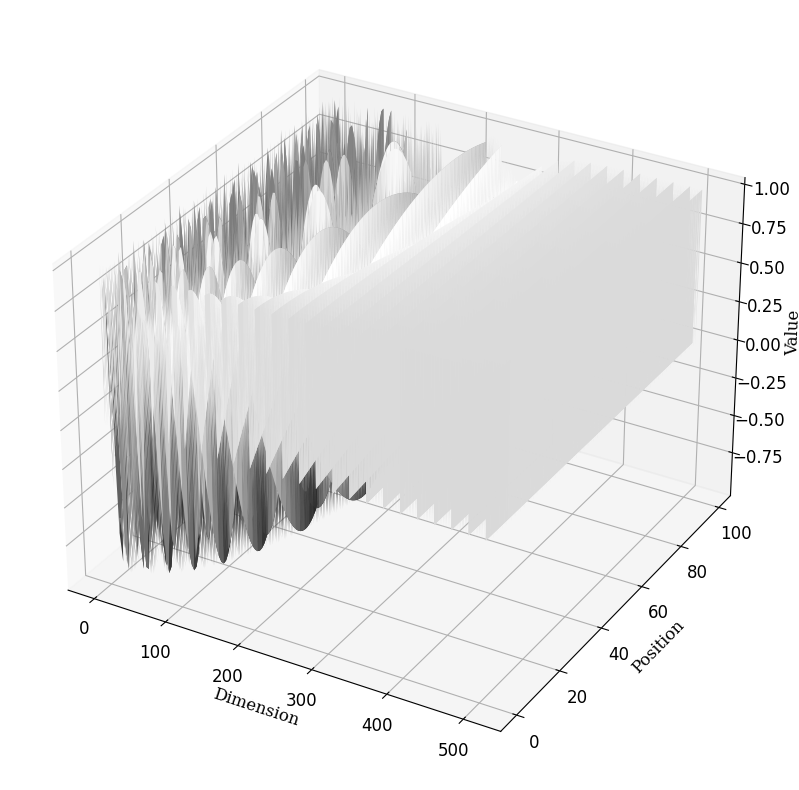

In [ ]:
# Plot the position encodings (2D plot)
plt.figure(figsize=(10, 6))
# Define the font family
csfont = {'fontname':'serif'}
# Display the matrix of position encodings as an image
plt.imshow(position_encodings, cmap='gray', aspect='auto')
# Label the x-axis, set the font size and font family
plt.xlabel('Dimension', fontsize=12,**csfont)
# Label the y-axis, set the font size and font family
plt.ylabel('Position', fontsize=12,**csfont)
# Set the font size and font family of x-axis tick labels
plt.xticks(fontsize=12,**csfont)
# Set the font size and font family of y-axis tick labels
plt.yticks(fontsize=12,**csfont)
# Add color bar indicating values
plt.colorbar()
# Save the plot as a PDF file
plt.savefig('Position.pdf')
# Display the plot
plt.show()

# Plot the position encodings (3D plot)
fig = plt.figure(figsize=(12, 10))
ax = fig.add_subplot(111, projection='3d')
# Create array for x-axis values
x = np.arange(D)
# Create array for y-axis values
y = np.arange(s)
# Create 2D grid of X and Y values
X, Y = np.meshgrid(x, y)
# Use position encodings as Z values
Z = position_encodings
# Plot 3D surface
ax.plot_surface(X, Y, Z, cmap='gray')
# Label the x-axis, set the font size and font family
ax.set_xlabel('Dimension', fontsize=12,**csfont)
# Label the y-axis, set the font size and font family
ax.set_ylabel('Position', fontsize=12,**csfont)
# Label the z-axis, set the font size and font family
ax.set_zlabel('Value', fontsize=12,**csfont)
# Set tick label size
ax.tick_params(labelsize=12)
# Save the plot as a PDF file
plt.savefig('Position_3D.pdf')
# Display the plot
plt.show()

### Inferences from the plots
2D Plot:

- The 2D plot visualizes the positional encodings as a grayscale image.
- Each row in the image corresponds to a position in the sequence.
- Each column represents a dimension in the positional encoding vector.
- The intensity of each pixel represents the value of the positional encoding at that particular position and dimension.

3D Plot:

- The 3D plot presents a surface representation of the positional encodings.
- The surface plot shows how the value of the positional encodings varies across different dimensions and positions within the sequence.
- Peaks and troughs in the surface indicate regions of high and low values of the positional encodings, respectively.
